In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv(r"C:\Users\PROGRESSIVE\Downloads\AmdariChurnProject\Electrotech-forecasting\cleaned_data.csv")

In [2]:
data

,Product_ID,Category,Price,Date,Season,Market_Trend_Index,Competitor_Activity_Score,Consumer_Confidence_Index,Product_Specification_1,Product_Specification_2,Sales_Volume
0,1103,Laptop,105.32,2009-01-01,Winter,-1.859160,0.546694,84.680465,Spec_C,Long-Battery-Life,49
1,1436,Tablet,145.55,2009-01-01,Winter,-0.345587,0.940428,42.919288,Spec_C,Lightweight,69
2,1271,Smartphone,97.82,2009-01-01,Winter,-0.384738,0.751155,55.191268,Spec_B,Lightweight,50
3,1107,Laptop,64.00,2009-01-01,Winter,0.716763,0.125939,88.746454,Spec_B,High-Resolution,28
4,1072,Tablet,67.83,2009-01-01,Winter,-0.242074,-0.412932,67.947536,Spec_A,Long-Battery-Life,81
...,...,...,...,...,...,...,...,...,...,...,...
136188,1361,Tablet,97.73,2020-12-29,Winter,0.953956,-0.555596,69.407099,Spec_C,High-Resolution,162
136189,1147,Tablet,173.21,2020-12-29,Winter,-0.781121,0.323828,90.737931,Spec_B,Long-Battery-Life,161
136190,1405,Accessories,154.62,2020-12-30,Winter,-0.210343,-1.055551,53.747320,Spec_A,Long-Battery-Life,182
136191,1329,Smartphone,152.00,2020-12-30,Winter,-0.492417,-1.064359,88.582224,Spec_A,Long-Battery-Life,287


In [5]:
sales_by_date_category = data.groupby(['Date', 'Category']).sum()['Sales_Volume'].reset_index()

In [6]:
sales_by_date_category['Category'].unique()

array(['Accessories', 'Laptop', 'Smartphone', 'Tablet'], dtype=object)

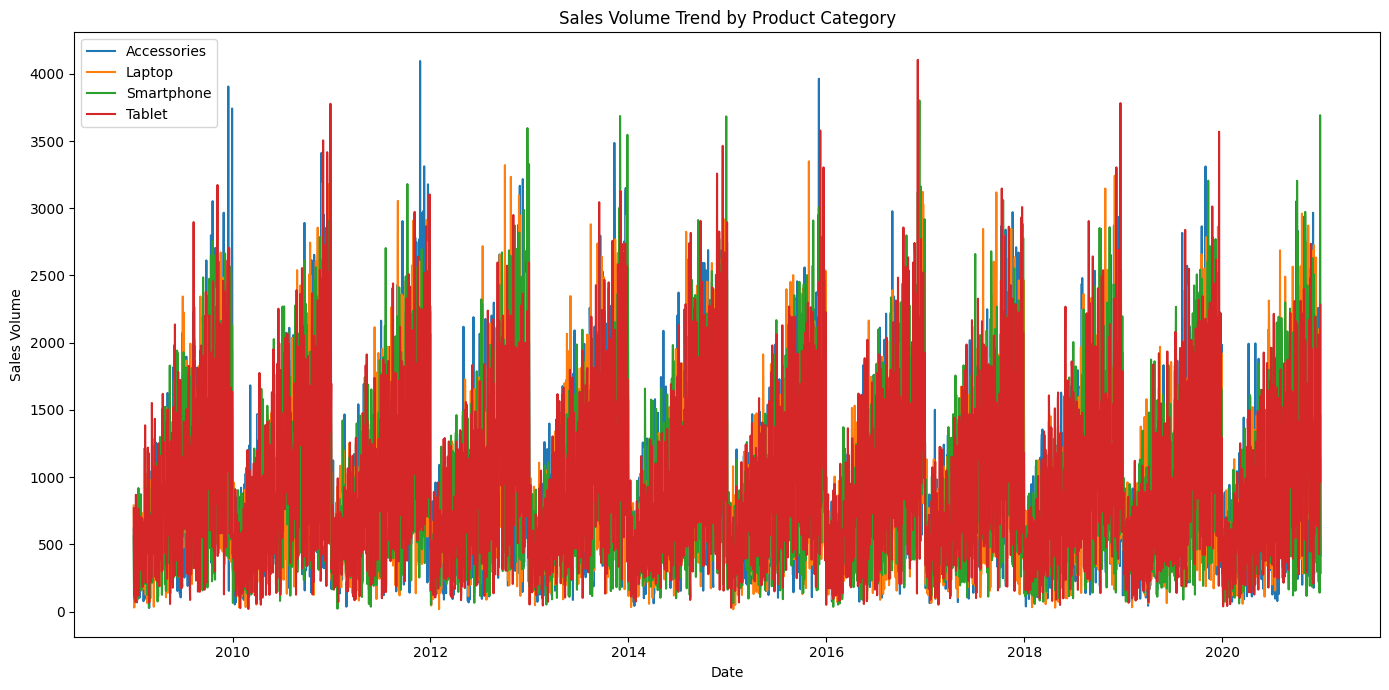

In [8]:
plt.figure(figsize=(14, 7))
for category in sales_by_date_category['Category'].unique().tolist():
    subset = sales_by_date_category[sales_by_date_category['Category'] == category]
    plt.plot(pd.to_datetime(subset['Date']), subset['Sales_Volume'], label=category)

plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.title('Sales Volume Trend by Product Category')
plt.legend()
plt.tight_layout()
plt.show()

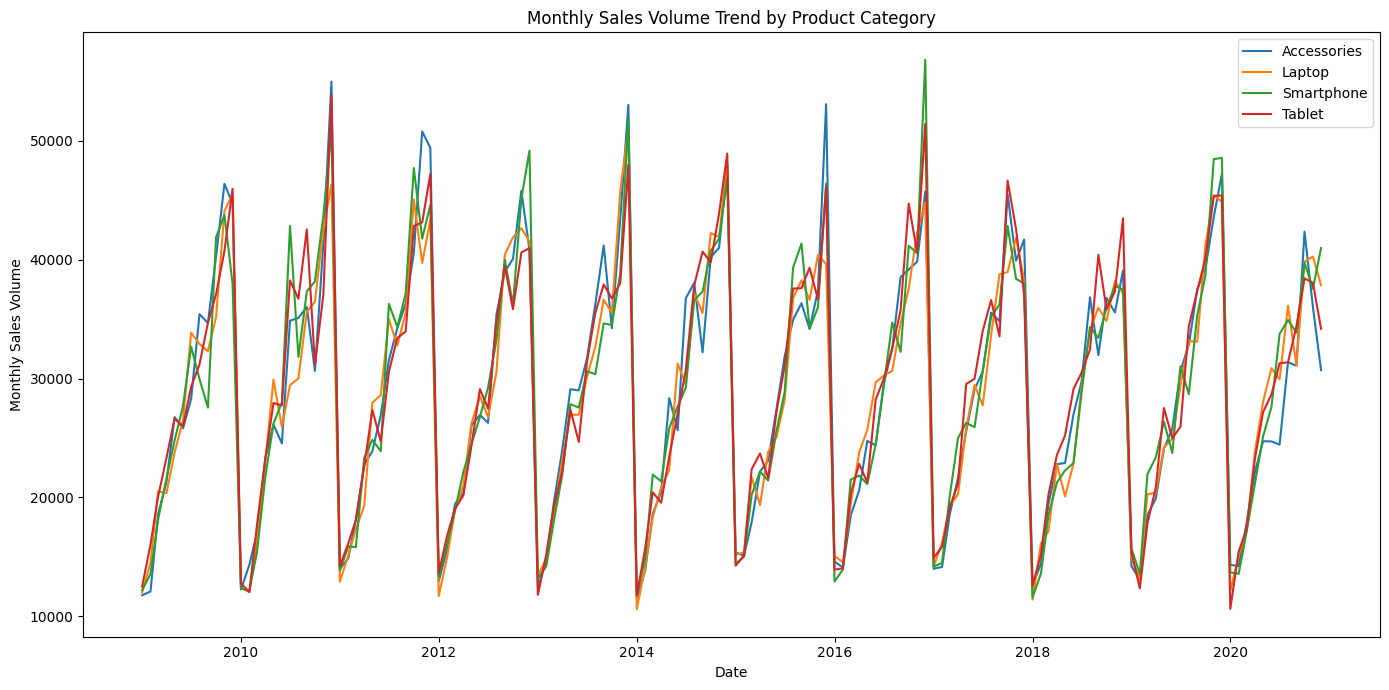

In [9]:
data['Date'] = pd.to_datetime(data['Date'])

# Group by month and category
monthly_sales = data.groupby([data['Date'].dt.to_period('M'), 'Category']).sum(numeric_only=True)['Sales_Volume'].reset_index()
monthly_sales['Date'] = monthly_sales['Date'].dt.to_timestamp()

plt.figure(figsize=(14, 7))
for category in monthly_sales['Category'].unique():
    subset = monthly_sales[monthly_sales['Category'] == category]
    plt.plot(subset['Date'], subset['Sales_Volume'], label=category)

plt.xlabel('Date')
plt.ylabel('Monthly Sales Volume')
plt.title('Monthly Sales Volume Trend by Product Category')
plt.legend()
plt.tight_layout()
plt.show()

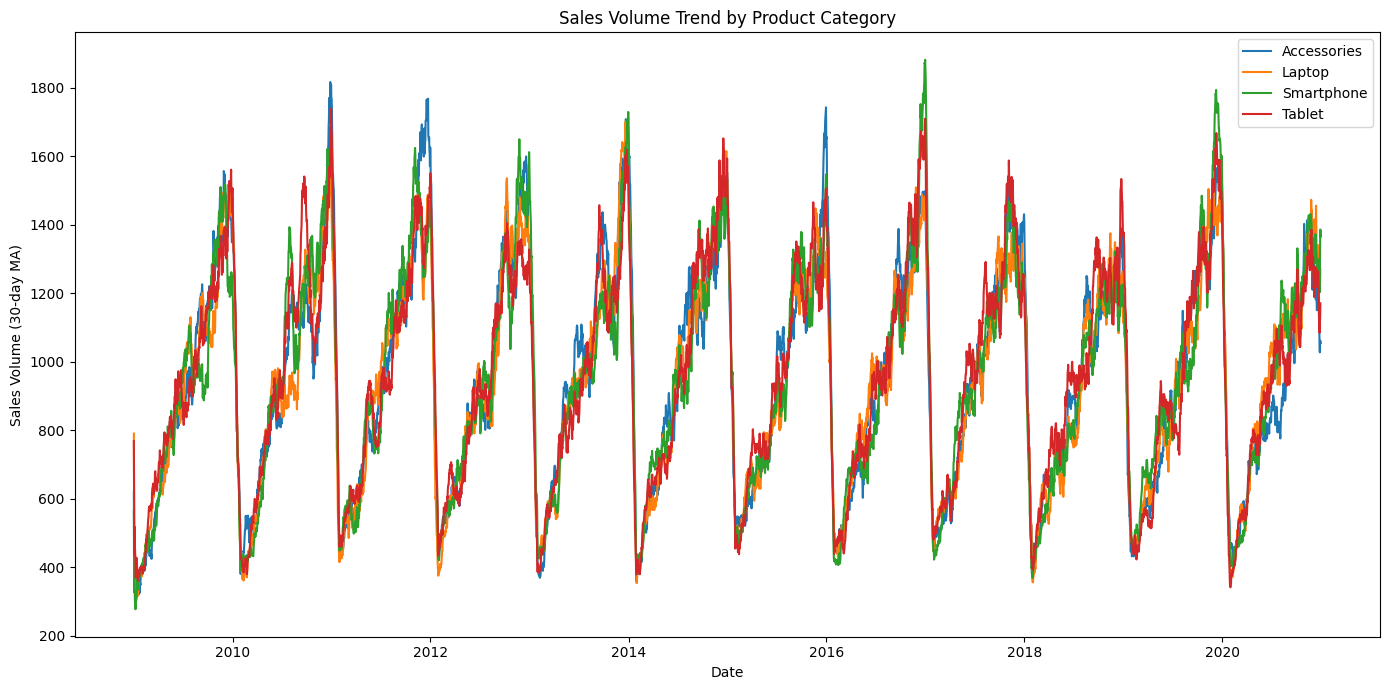

In [11]:
plt.figure(figsize=(14, 7))
for category in sales_by_date_category['Category'].unique():
    subset = sales_by_date_category[sales_by_date_category['Category'] == category].copy()
    subset['Sales_Volume_Smooth'] = subset['Sales_Volume'].rolling(window=30, min_periods=1).mean()
    plt.plot(pd.to_datetime(subset['Date']), subset['Sales_Volume_Smooth'], label=category)

plt.xlabel('Date')
plt.ylabel('Sales Volume (30-day MA)')
plt.title('Sales Volume Trend by Product Category')
plt.legend()
plt.tight_layout()
plt.show()

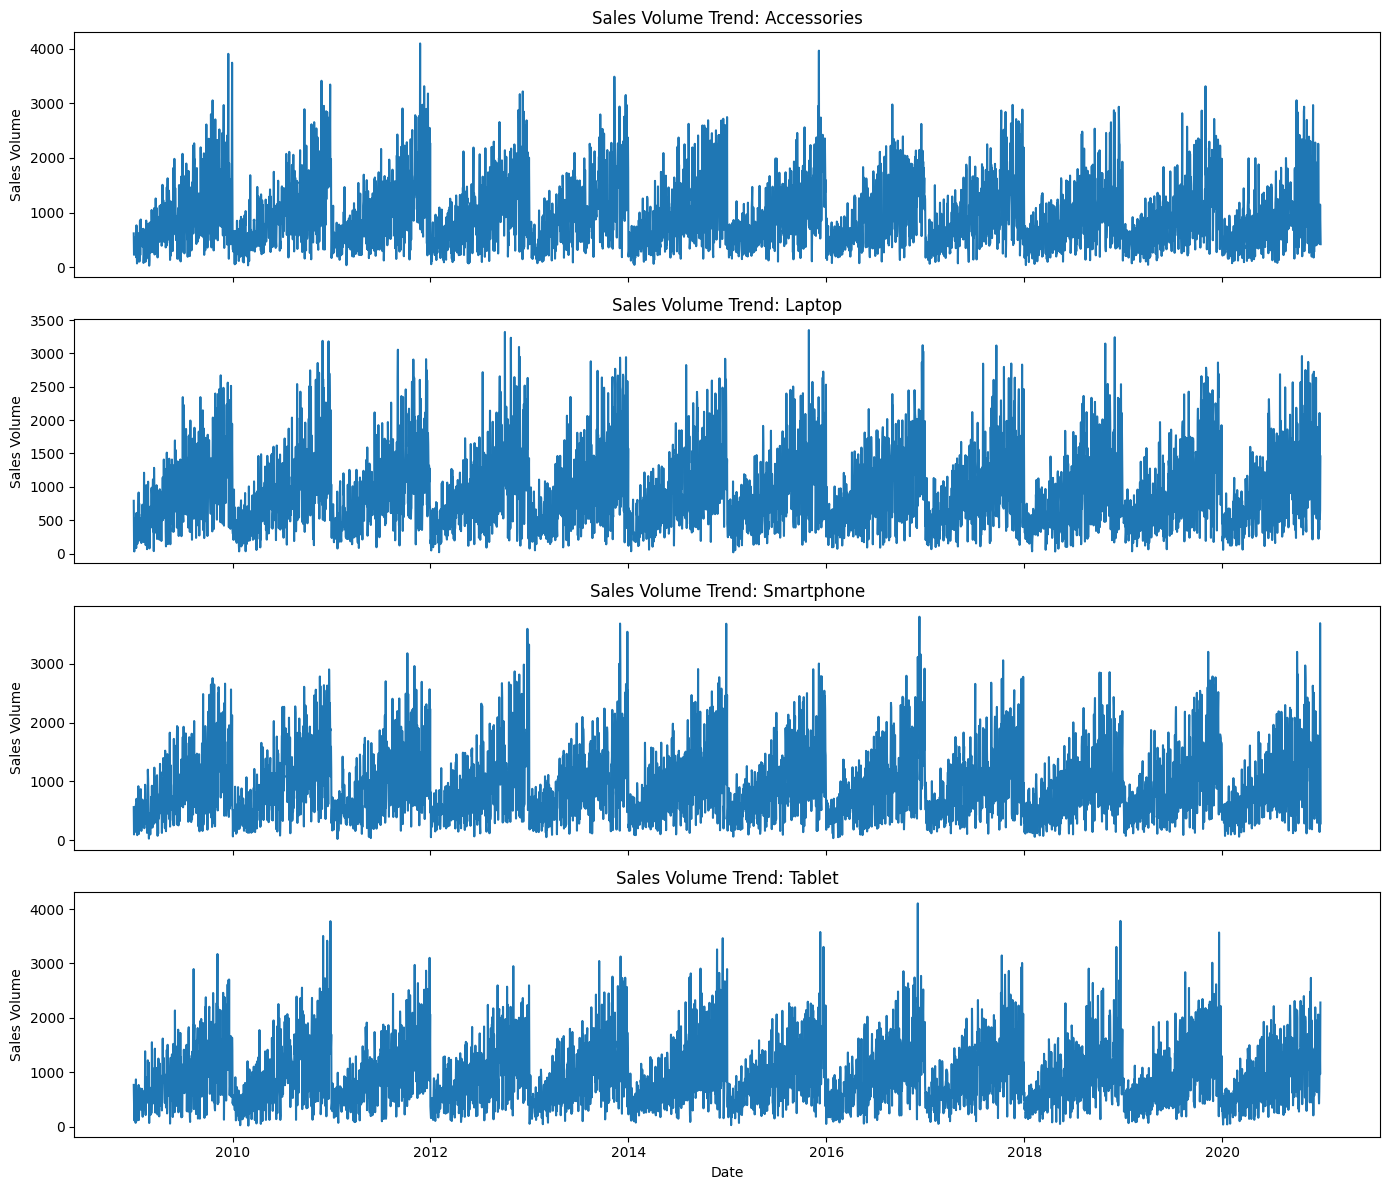

In [12]:
categories = sales_by_date_category['Category'].unique()
fig, axes = plt.subplots(len(categories), 1, figsize=(14, 3 * len(categories)), sharex=True)

for i, category in enumerate(categories):
    subset = sales_by_date_category[sales_by_date_category['Category'] == category]
    axes[i].plot(pd.to_datetime(subset['Date']), subset['Sales_Volume'])
    axes[i].set_title(f'Sales Volume Trend: {category}')
    axes[i].set_ylabel('Sales Volume')

plt.xlabel('Date')
plt.tight_layout()
plt.show()

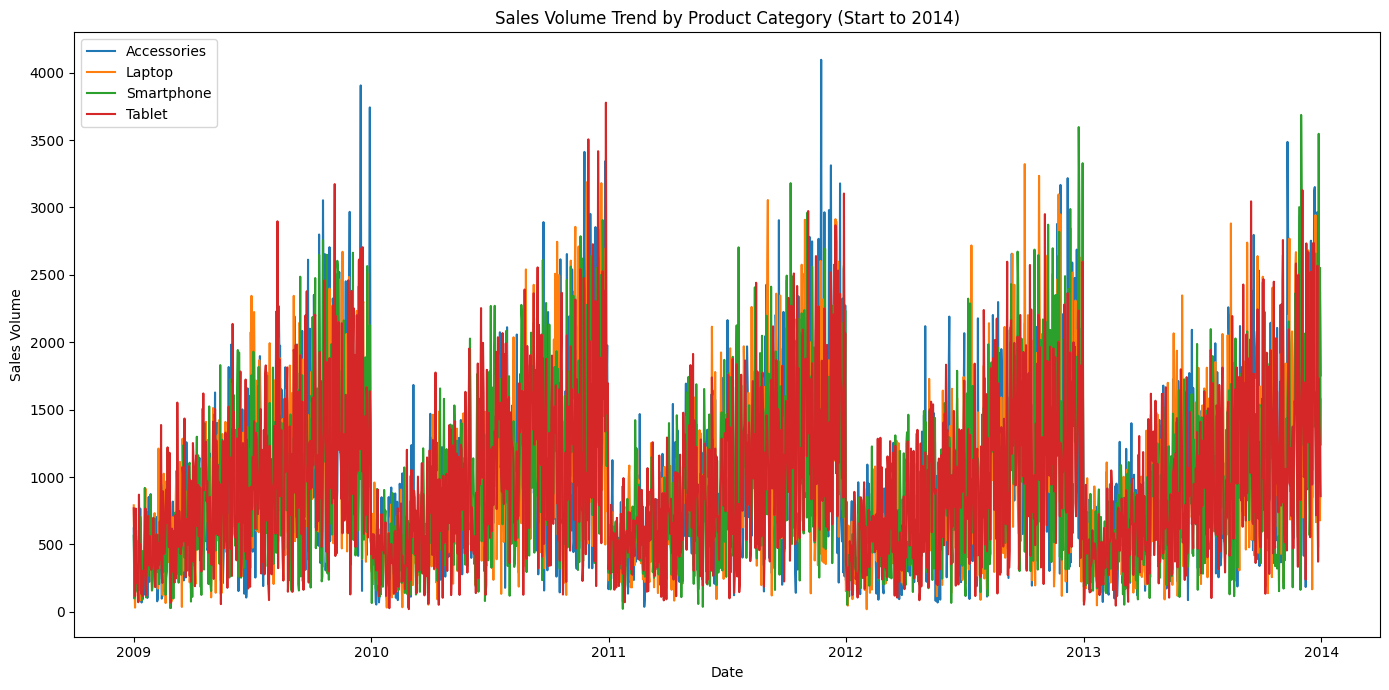

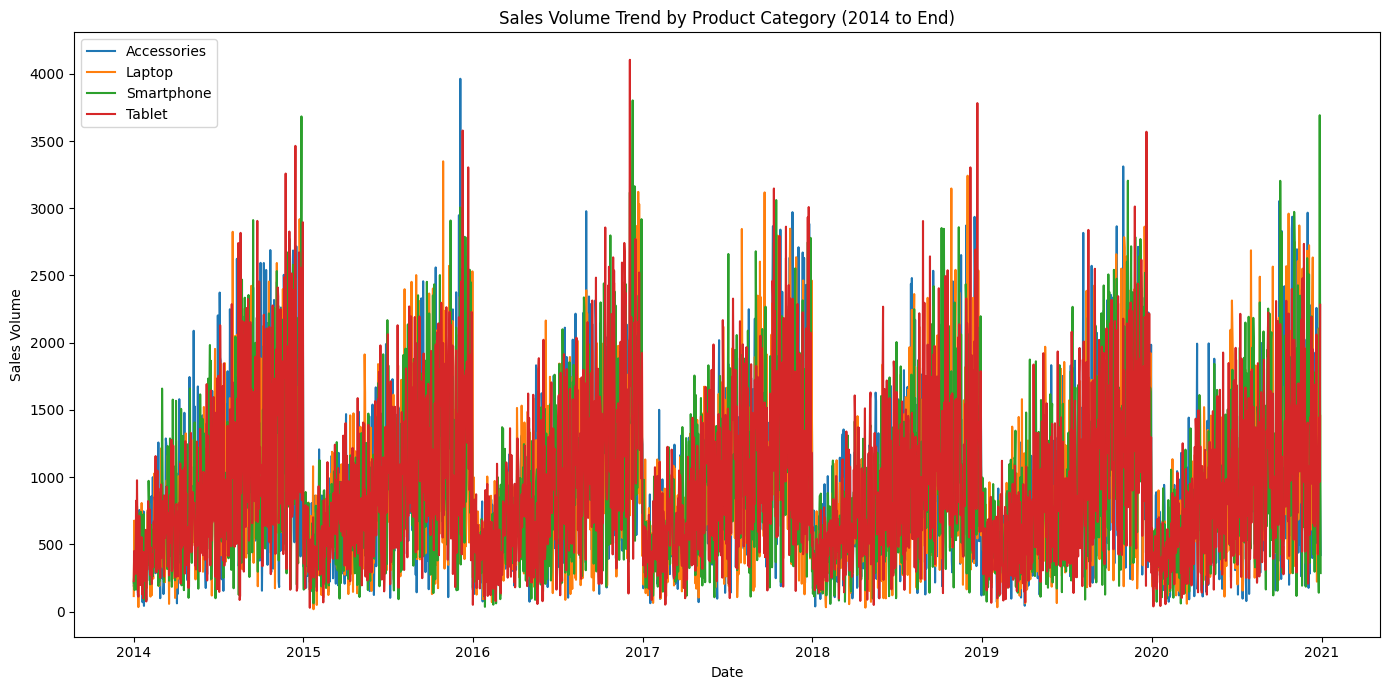

In [15]:
before_2014 = sales_by_date_category[sales_by_date_category['Date'] < '2014-01-01']
after_2014 = sales_by_date_category[sales_by_date_category['Date'] >= '2014-01-01']

# Plot: Start to 2014
plt.figure(figsize=(14, 7))
for category in before_2014['Category'].unique():
    subset = before_2014[before_2014['Category'] == category]
    plt.plot(subset['Date'], subset['Sales_Volume'], label=category)
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.title('Sales Volume Trend by Product Category (Start to 2014)')
plt.legend()
plt.tight_layout()
plt.show()

# Plot: 2014 to End 
plt.figure(figsize=(14, 7))
for category in after_2014['Category'].unique():
    subset = after_2014[after_2014['Category'] == category]
    plt.plot(subset['Date'], subset['Sales_Volume'], label=category)
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.title('Sales Volume Trend by Product Category (2014 to End)')
plt.legend()
plt.tight_layout()
plt.show()